<a href="https://colab.research.google.com/github/Ahmed11Raza/Python-Projects/blob/main/Iris_Flower_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Enable inline plots for visualization
%matplotlib inline

# Set a Seaborn style for better visuals
sns.set(style="whitegrid")


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for a quick look at the data
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Display the first five rows of the DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


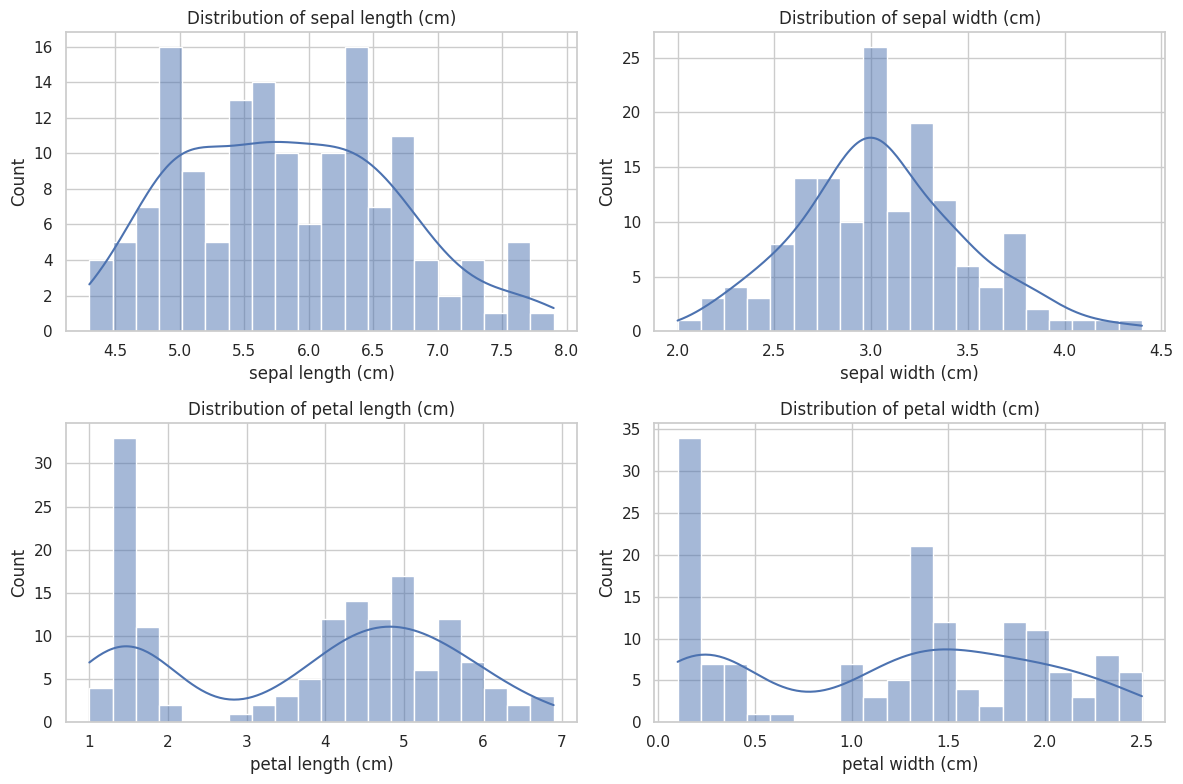

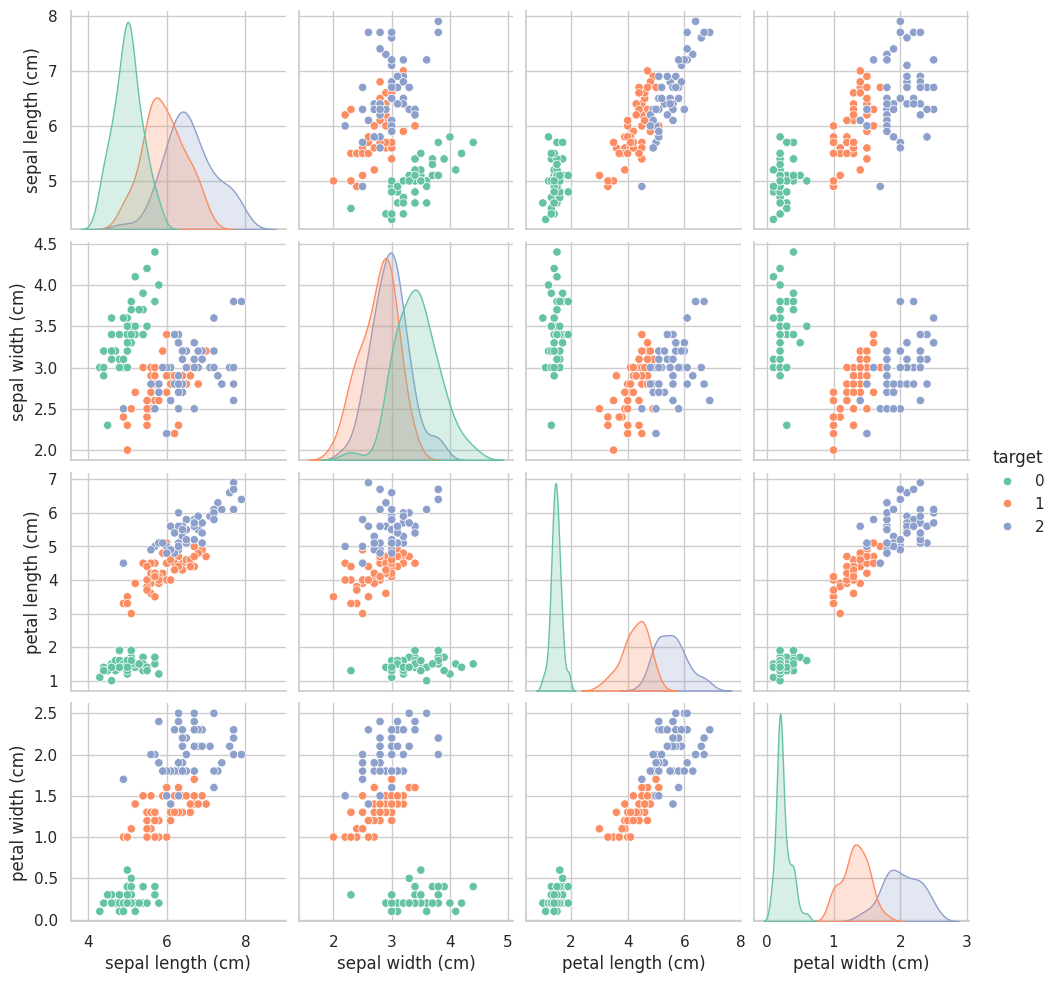

In [3]:
# Summary statistics
print(df.describe())

# Visualize feature distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Pairplot to see the relationships between features colored by the target
sns.pairplot(df, hue='target', palette='Set2')
plt.show()


In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Instantiate and train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



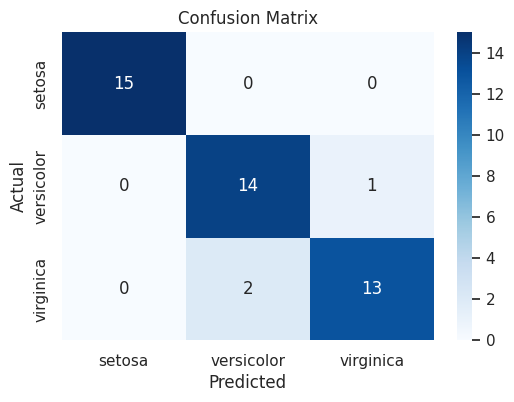

In [5]:
# Predict the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


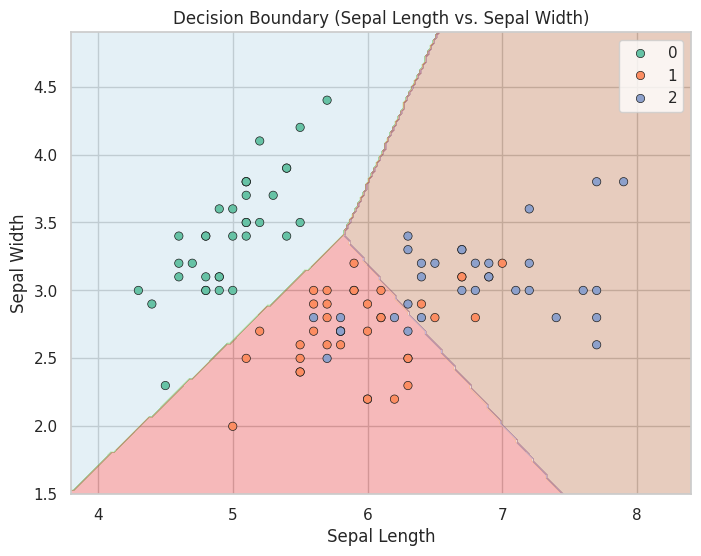

In [6]:
# Choose two features for visualization: sepal length and sepal width
X_vis = X[:, :2]

# Split using the two selected features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.3, random_state=42, stratify=y)

# Train a logistic regression model on the two-dimensional data
model_vis = LogisticRegression(max_iter=200)
model_vis.fit(X_train_vis, y_train_vis)

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    # Set the range of the plot
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set2', edgecolor='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(title)
    plt.show()

# Plot decision boundary for our 2D model
plot_decision_boundary(model_vis, X_train_vis, y_train_vis,
                       "Decision Boundary (Sepal Length vs. Sepal Width)")
